In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets
from torchvision import transforms
import numpy as np 

In [3]:
mnist_dataset = torchvision.datasets.MNIST('./minst', train = True, download=False)

In [4]:
if False:
    it = iter(mnist_dataset)
    img, label = next(it)
    plt.imshow(img);
    plt.show();

In [10]:
tensor_transform = transforms.ToTensor()

dataset = datasets.MNIST(root = "./minst",
                         train = True,                         download = False,
                         transform = tensor_transform)

loader = torch.utils.data.DataLoader(dataset = dataset,
                                     batch_size = 32,
                                     shuffle = True)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [36]:
class Encoder(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = torch.nn.Conv2d(1, 32, (3, 3), padding=1)
        self.act_1 = torch.nn.ReLU()
        self.conv2 = torch.nn.Conv2d(32, 16, (3, 3), padding=1)
        self.act_2 = torch.nn.ReLU()
        self.conv3 = torch.nn.Conv2d(16, 8, (3, 3), padding=1)
        self.act_3 = torch.nn.ReLU()
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.act_1(x)
        x = self.conv2(x)
        x = self.act_2(x)
        x = self.conv3(x)
        x = self.act_3(x)
        # x.shape[0] : 批次數
        x = torch.reshape(x, (x.shape[0], -1))
        return x
    
class Decoder(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.dconv1 = torch.nn.ConvTranspose2d(8,16, (3,3), padding=1)
        self.act_1 = torch.nn.ReLU()
        self.dconv2 = torch.nn.ConvTranspose2d(16,32, (3,3), padding=1)
        self.act_2 = torch.nn.ReLU()
        self.dconv3 = torch.nn.ConvTranspose2d(32, 1, (3,3), padding=1)
        self.act_3 = torch.nn.ReLU()
        
    def forward(self, x):
        # (batch, 8=根據Encoder的最後一層 Conv depth, , )
        x = torch.reshape(x, (-1, 8, 28, 28))
        
        x = self.dconv1(x)
        x = self.act_1(x)
        x = self.dconv2(x)
        x = self.act_2(x)
        x = self.dconv3(x)
        x = self.act_3(x)
        
        return x


class NAE(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        
        return x

# 28*28 ==> 9 ==> 28*28
class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()
          
        # Building an linear encoder with Linear
        # layer followed by Relu activation function
        # 784 ==> 9
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28 * 28, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 9)
        )
          
        # Building an linear decoder with Linear
        # layer followed by Relu activation function
        # The Sigmoid activation function
        # outputs the value between 0 and 1
        # 9 ==> 784
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(9, 18),
            torch.nn.ReLU(),
            torch.nn.Linear(18, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 28 * 28),
            torch.nn.Sigmoid()
        )
  
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [39]:
# test unit 可以做動
hi_encoder = Encoder()

out = hi_encoder(torch.randn((1, 1, 28, 28)))
print(out.shape)

hi_decoder = Decoder()

oout = hi_decoder(out)
print(oout.shape)

hi_autoencoder = NAE()

hi_out = hi_autoencoder(torch.randn((1, 1, 28, 28)))
hi_out.shape


torch.Size([1, 6272])
torch.Size([1, 1, 28, 28])


torch.Size([1, 1, 28, 28])

In [7]:
model = AE()
model.cuda()
  
# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()
  
# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters(),
                             lr = 1e-1,
                             weight_decay = 1e-8)

In [14]:
fake_batch = torch.randn((1,28*28), device=device)
model(fake_batch)

tensor([[0.4824, 0.5005, 0.4867, 0.5055, 0.4939, 0.4941, 0.5185, 0.5006, 0.5093,
         0.5199, 0.4747, 0.5147, 0.5056, 0.4705, 0.4920, 0.5233, 0.5110, 0.5041,
         0.5168, 0.4862, 0.4735, 0.5131, 0.5182, 0.5078, 0.5102, 0.4838, 0.4723,
         0.4765, 0.4857, 0.4936, 0.5153, 0.4703, 0.4999, 0.5221, 0.4983, 0.4987,
         0.5217, 0.5000, 0.5088, 0.4866, 0.5041, 0.5134, 0.5229, 0.4886, 0.5149,
         0.5114, 0.4870, 0.5017, 0.4794, 0.4738, 0.4911, 0.4910, 0.4865, 0.5096,
         0.4843, 0.5218, 0.4847, 0.4999, 0.4998, 0.4903, 0.5383, 0.5010, 0.4945,
         0.4901, 0.4953, 0.4829, 0.4985, 0.4895, 0.5134, 0.4844, 0.5164, 0.4823,
         0.5286, 0.5069, 0.5279, 0.5184, 0.4892, 0.5101, 0.5233, 0.4999, 0.5272,
         0.5017, 0.4962, 0.4852, 0.4860, 0.4750, 0.4816, 0.5001, 0.4663, 0.4982,
         0.5200, 0.5220, 0.4870, 0.4725, 0.5187, 0.5213, 0.5319, 0.5046, 0.5050,
         0.4926, 0.5127, 0.5087, 0.4816, 0.4767, 0.4975, 0.5121, 0.5153, 0.5248,
         0.4632, 0.4852, 0.4

C:\Users\Anicca\AppData\Local\Temp\ipykernel_25956\3315468010.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  image = torch.tensor(image, device="cuda")


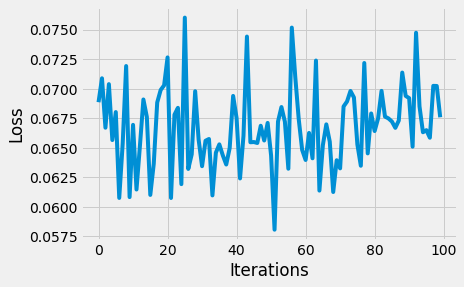

In [11]:
epochs = 20
outputs = []
losses = []
for epoch in range(epochs):
    for (image, _) in loader:
        # Reshaping the image to (-1, 784)
        image = image.reshape(-1, 28*28)
        image = torch.tensor(image, device=device)
        # Output of Autoencoder
        reconstructed = model(image)
        # Calculating the loss function
        loss = loss_function(reconstructed, image)
        # The gradients are set to zero,
        # the the gradient is computed and stored.
        # .step() performs parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Storing the losses in a list for plotting
        losses.append(loss.detach().cpu().numpy())
    outputs.append((epochs, image, reconstructed))
  
# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
  
# Plotting the last 100 values
plt.plot(losses[-100:])

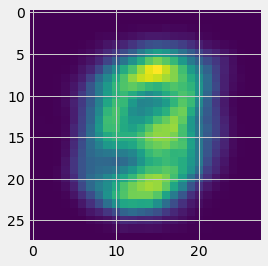

In [14]:
for i, item in enumerate(image):
    
  # Reshape the array for plotting
  item = item.reshape(-1, 28, 28).detach().cpu().numpy()
  plt.imshow(item[0])
  
for i, item in enumerate(reconstructed):
  item = item.reshape(-1, 28, 28).detach().cpu().numpy()
  plt.imshow(item[0])

In [55]:
plt.show()